In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tgate_counter import count_tgate
import numpy as np
from qiskit import QuantumCircuit, assemble
from qiskit import QuantumCircuit, execute, Aer


In [3]:
qc = QuantumCircuit(3,0)

qc.rz(np.pi/4, 2)
qc.cx(1,2)
qc.rz(-np.pi/4, 1)
qc.cx(0,2)
qc.rz(np.pi/4, 0)
qc.cx(1,2)
qc.rz(np.pi*1.5, 2)
qc.h(2)
qc.ccx(0,1,2)
qc.rz(-np.pi/0.5, 2)
myqasm = qc.qasm()
print(myqasm)
qc.draw()


OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
rz(pi/4) q[2];
cx q[1],q[2];
rz(-pi/4) q[1];
cx q[0],q[2];
rz(pi/4) q[0];
cx q[1],q[2];
rz(3*pi/2) q[2];
h q[2];
ccx q[0],q[1],q[2];
rz(-2*pi) q[2];



┌─────────┐                      »
q_0: ──────────────────────────────■──┤ Rz(π/4) ├───────────────────■──»
                     ┌──────────┐  │  └─────────┘                   │  »
q_1: ─────────────■──┤ Rz(-π/4) ├──┼───────■────────────────────────■──»
     ┌─────────┐┌─┴─┐└──────────┘┌─┴─┐   ┌─┴─┐   ┌──────────┐┌───┐┌─┴─┐»
q_2: ┤ Rz(π/4) ├┤ X ├────────────┤ X ├───┤ X ├───┤ Rz(3π/2) ├┤ H ├┤ X ├»
     └─────────┘└───┘            └───┘   └───┘   └──────────┘└───┘└───┘»
«                
«q_0: ───────────
«                
«q_1: ───────────
«     ┌─────────┐
«q_2: ┤ Rz(-2π) ├
«     └─────────┘

In [4]:

def simulate(qasm_str):
    qc = QuantumCircuit.from_qasm_str(qasm_str)
    qc.save_statevector(label=f'state')
    simulator = Aer.get_backend('aer_simulator_statevector')
    vec = np.array(simulator.run(qc).result().data(0)["state"])
    # print(vec)
    # print(bin(np.argmax(vec)))
    return bin(np.argmax(vec))


In [5]:
count_tgate(myqasm)

(3, 2)

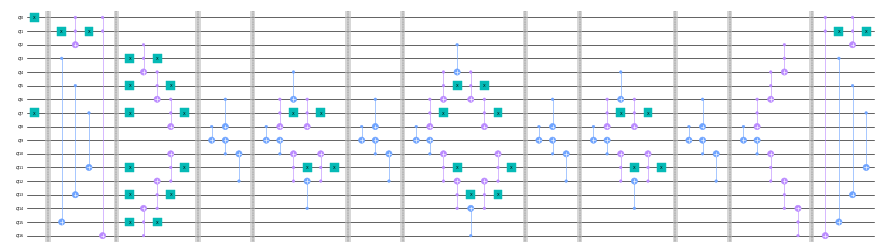

In [7]:
from tgate_counter.qrom import create_qrom, create_qrom_ref
from tgate_counter import count_tgate

size = 4
target = 1
succinct = False
val = 8
data = "1"*(2**4)
c = create_qrom(size, target, succinct, val=val, data=data)
qasm = c.qasm()
c_opt = create_qrom_ref(size, target, succinct, val=val, data=data)
qasm_opt = c_opt.qasm()
count_tgate(qasm),count_tgate(qasm_opt)

# c.draw(output="mpl", scale=0.3, fold=-1, filename="before.png")
# c_opt.draw(output="mpl", scale=0.3, fold=-1, filename="after.png")
c.draw(output="mpl", scale=0.3, fold=-1)
c_opt.draw(output="mpl", scale=0.3, fold=-1)

In [92]:
simulate(qasm)
simulate(qasm_opt)

'0b1'

In [98]:
c.draw()

┌───┐ ░                                                              »
 q_0: ┤ X ├─░──────────────────────────────■───────────────────────────────»
      └───┘ ░ ┌───┐                        │             ┌───┐ ┌───┐       »
 q_1: ──────░─┤ X ├────────────■───────────┼─────────■───┤ X ├─┤ H ├───────»
            ░ └───┘┌───┐┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐├───┤┌─────┐»
 q_2: ──────░──|0>─┤ H ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ H ├┤ Sdg ├»
            ░ ┌───┐└───┘└───┘└───┘└─────┘└───┘└───┘└───┘└─────┘└───┘└─────┘»
 q_3: ──────░─┤ X ├────────────■───────────────────────────────────────────»
            ░ └───┘┌───┐┌───┐┌─┴─┐┌─────┐                                  »
 q_4: ──────░──|0>─┤ H ├┤ T ├┤ X ├┤ Tdg ├──────────────────────────────────»
            ░ ┌───┐└───┘└───┘└───┘└─────┘                                  »
 q_5: ──────░─┤ X ├────────────■───────────────────────────────────────────»
            ░ └───┘┌───┐┌───┐┌─┴─┐┌─────┐                                  »
 q_6: ──────░──|0>─┤ H ├┤ T ├┤ X ├┤ Tdg ├──────────────────────────────────»
      ┌───┐ ░ ┌───┐└───┘└───┘└───┘└─────┘                                  »
 q_7: ┤ X ├─░─┤ X ├────────────■───────────────────────────────────────────»
      └───┘ ░ └───┘┌───┐┌───┐┌─┴─┐┌─────┐                                  »
 q_8: ──────░──|0>─┤ H ├┤ T ├┤ X ├┤ Tdg ├──────────────────────────────────»
            ░ ┌───┐└───┘└───┘└───┘└─────┘                                  »
 q_9: ──────░─┤ X ├────────────■───────────────────────────────────────────»
            ░ └───┘┌───┐┌───┐┌─┴─┐┌─────┐                                  »
q_10: ──────░──|0>─┤ H ├┤ T ├┤ X ├┤ Tdg ├──────────────────────────────────»
            ░      └───┘└───┘└───┘└─────┘                                  »
q_11: ──────░──────────────────────────────────────────────────────────────»
            ░                                                              »
 c: 1/═════════════════════════════════════════════════════════════════════»
                                                                           »
«                                                                          »
« q_0: ────────────────────────────────────────────────────────────────────»
«                                                                          »
« q_1: ────────────────────────────────────────────────────────────────────»
«                                                                          »
« q_2: ──■─────────────────────────────────────────────────────────────────»
«        │             ┌───┐ ┌───┐                                         »
« q_3: ──┼─────────■───┤ X ├─┤ H ├─────────────────────────────────────────»
«      ┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐├───┤┌─────┐                                  »
« q_4: ┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ H ├┤ Sdg ├──■───────────────────────────────»
«      └───┘└───┘└───┘└─────┘└───┘└─────┘  │             ┌───┐ ┌───┐       »
« q_5: ────────────────────────────────────┼─────────■───┤ X ├─┤ H ├───────»
«                                        ┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐├───┤┌─────┐»
« q_6: ──────────────────────────────────┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ H ├┤ Sdg ├»
«                                        └───┘└───┘└───┘└─────┘└───┘└─────┘»
« q_7: ────────────────────────────────────────────────────────────────────»
«                                                                          »
« q_8: ────────────────────────────────────────────────────────────────────»
«                                                                          »
« q_9: ────────────────────────────────────────────────────────────────────»
«                                                                          »
«q_10: ────────────────────────────────────────────────────────────────────»
«                                                                          »
«q_11: ────────────────────────────────────────────────────────────────────»
«                                                                          »
« 

In [99]:
c_opt.draw()

┌───┐ ░                                                            »
 q_0: ┤ X ├─░──────────────────────────────■─────────────────────────────»
      └───┘ ░ ┌───┐                        │             ┌───┐           »
 q_1: ──────░─┤ X ├────────────■───────────┼─────────■───┤ X ├────────■──»
            ░ └───┘┌───┐┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐┌───┐  │  »
 q_2: ──────░──|0>─┤ H ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ H ├──┼──»
            ░      └───┘└───┘└───┘└─────┘└───┘└───┘└───┘└─────┘└───┘  │  »
 q_3: ──────░───■─────────────────────────────────────────────────────┼──»
            ░   │                                                     │  »
 q_4: ──────░───┼─────────────────────────────────────────────────────┼──»
            ░   │                                                     │  »
 q_5: ──────░───┼────■────────────────────────────────────────────────┼──»
            ░   │    │                                                │  »
 q_6: ──────░───┼────┼────────────────────────────────────────────────┼──»
      ┌───┐ ░   │    │                                                │  »
 q_7: ┤ X ├─░───┼────┼────■───────────────────────────────────────────┼──»
      └───┘ ░   │    │    │                                           │  »
 q_8: ──────░───┼────┼────┼───────────────────────────────────────────┼──»
            ░   │    │    │                                           │  »
 q_9: ──────░───┼────┼────┼────■──────────────────────────────────────┼──»
            ░   │    │    │    │                                      │  »
q_10: ──────░───┼────┼────┼────┼──────────────────────────────────────┼──»
            ░   │    │    │    │                                      │  »
q_11: ──────░───┼────┼────┼────┼──────────────────────────────────────┼──»
            ░   │    │    │    │                                      │  »
q_12: ──────░───┼────┼────┼────┼──────────────────────────────────────┼──»
            ░   │    │    │  ┌─┴─┐                                    │  »
q_13: ──────░───┼────┼────┼──┤ X ├────────────────────────────────────┼──»
            ░   │    │    │  └───┘                                    │  »
q_14: ──────░───┼────┼────┼───────────────────────────────────────────┼──»
            ░   │    │  ┌─┴─┐                                         │  »
q_15: ──────░───┼────┼──┤ X ├─────────────────────────────────────────┼──»
            ░   │    │  └───┘                                         │  »
q_16: ──────░───┼────┼────────────────────────────────────────────────┼──»
            ░   │  ┌─┴─┐                                              │  »
q_17: ──────░───┼──┤ X ├──────────────────────────────────────────────┼──»
            ░   │  └───┘                                              │  »
q_18: ──────░───┼─────────────────────────────────────────────────────┼──»
            ░ ┌─┴─┐                                                   │  »
q_19: ──────░─┤ X ├───────────────────────────────────────────────────┼──»
            ░ └───┘┌───┐┌───┐                                       ┌─┴─┐»
q_20: ──────░──|0>─┤ H ├┤ T ├───────────────────────────────────────┤ X ├»
            ░      └───┘└───┘                                       └───┘»
 c: 1/═══════════════════════════════════════════════════════════════════»
                                                                         »
«                                                ░                            »
« q_0: ─────────■────────────────────────────────░────────────────────────────»
«               │                                ░                            »
« q_1: ─────────┼─────────■──────────────────────░────────────────────────────»
«      ┌─────┐  │         │                      ░                            »
« q_2: ┤ Sdg ├──┼─────────┼──────────────────────░────────────────────────────»
«      └─────┘  │         │                      ░ ┌───┐                      »
« q_3: ─────────┼─────────┼──────────────────────░─┤ X ├────────────■──

0b100011
0b100011


In [90]:
target = 1
succinct = False
for size in [2,3]:
    for val in range(0,2**size):
        for trial in range(10):
            data = "".join(np.random.choice(["0", "1"], 2**size))
            c = create_qrom(size, target, succinct, val=val, data=data)
            qasm = c.qasm()
            c_opt = create_qrom_ref(size, target, succinct, val=val, data=data)
            qasm_opt = c_opt.qasm()
            res1 = simulate(qasm)
            res2 = simulate(qasm_opt)
            print(f"size:{size}, val:{val}, trial:{trial}(data={data}) {res1} {res2} {res1==res2}")
            assert(res1 == res2)


size:2, val:0, trial:0(data=1100) 0b100001 0b100001 True
size:2, val:0, trial:1(data=0000) 0b1 0b1 True
size:2, val:0, trial:2(data=1000) 0b100001 0b100001 True
size:2, val:0, trial:3(data=0011) 0b1 0b1 True
size:2, val:0, trial:4(data=1110) 0b100001 0b100001 True
size:2, val:0, trial:5(data=0000) 0b1 0b1 True
size:2, val:0, trial:6(data=0011) 0b1 0b1 True
size:2, val:0, trial:7(data=0111) 0b1 0b1 True
size:2, val:0, trial:8(data=1011) 0b100001 0b100001 True
size:2, val:0, trial:9(data=0011) 0b1 0b1 True
size:2, val:1, trial:0(data=0011) 0b100011 0b100011 True
size:2, val:1, trial:1(data=1110) 0b100011 0b100011 True
size:2, val:1, trial:2(data=0011) 0b100011 0b100011 True
size:2, val:1, trial:3(data=0100) 0b11 0b11 True
size:2, val:1, trial:4(data=0101) 0b11 0b11 True
size:2, val:1, trial:5(data=1100) 0b11 0b11 True
size:2, val:1, trial:6(data=0101) 0b11 0b11 True
size:2, val:1, trial:7(data=1111) 0b100011 0b100011 True
size:2, val:1, trial:8(data=1101) 0b11 0b11 True
size:2, val:1, tr

In [31]:
from tgate_counter.qrom import create_qrom, create_qrom_ref
from tgate_counter import count_tgate

for size in range(2,10+1):
    c = create_qrom(size, 1, True)
    c_opt = create_qrom_ref(size, 1, True)
    qasm = c.qasm()
    qasm_opt = c_opt.qasm()
    res = count_tgate(qasm)
    res_opt = count_tgate(qasm_opt)
    print(f"size:{size:2} "
          f"t-count: {res[0]:4}->{res_opt[0]:4} ({res_opt[0]/res[0]*100:.2f}%) "
          f"t-depth: {res[1]:4}->{res_opt[1]:4} ({res_opt[1]/res[1]*100:.2f}%) ")
    

size: 2 t-count:   12->  24 (200.00%) t-depth:   10->  14 (140.00%) 
size: 3 t-count:   28->  40 (142.86%) t-depth:   22->  20 (90.91%) 
size: 4 t-count:   60->  72 (120.00%) t-depth:   46->  32 (69.57%) 
size: 5 t-count:  124-> 136 (109.68%) t-depth:   94->  56 (59.57%) 
size: 6 t-count:  252-> 264 (104.76%) t-depth:  190-> 104 (54.74%) 
size: 7 t-count:  508-> 520 (102.36%) t-depth:  382-> 200 (52.36%) 
size: 8 t-count: 1020->1032 (101.18%) t-depth:  766-> 392 (51.17%) 
size: 9 t-count: 2044->2056 (100.59%) t-depth: 1534-> 776 (50.59%) 
size:10 t-count: 4092->4104 (100.29%) t-depth: 3070->1544 (50.29%) 


In [83]:
from tgate_counter import evaluate_qrom

evaluate_qrom(2, 10)

size: 2 t-count:   12->  24 (200.00%) t-depth:   10->  14 (140.00%) 
size: 3 t-count:   28->  40 (142.86%) t-depth:   22->  20 (90.91%) 
size: 4 t-count:   60->  72 (120.00%) t-depth:   46->  32 (69.57%) 
size: 5 t-count:  124-> 136 (109.68%) t-depth:   94->  56 (59.57%) 
size: 6 t-count:  252-> 264 (104.76%) t-depth:  190-> 104 (54.74%) 
size: 7 t-count:  508-> 520 (102.36%) t-depth:  382-> 200 (52.36%) 
size: 8 t-count: 1020->1032 (101.18%) t-depth:  766-> 392 (51.17%) 
size: 9 t-count: 2044->2056 (100.59%) t-depth: 1534-> 776 (50.59%) 
size:10 t-count: 4092->4104 (100.29%) t-depth: 3070->1544 (50.29%) 
